In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=";")

In [2]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


### splitting 

In [5]:
# shuffling the df
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected for training
df_train = df.head(1000)

# bottom 599 values for testing/validation
df_test = df.tail(599)

## Decision Tree

In [6]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns to train on: use all
#cols = df.columns

# train
clf.fit(df_train.drop("quality", axis=1), df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [7]:
train_predictions = clf.predict(df_train.drop("quality", axis=1))

test_predictions = clf.predict(df_test.drop("quality", axis=1))

train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [8]:
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.588
Test Accuracy: 0.5392320534223706


In [9]:
# case of max_depth=7
clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(df_train.drop("quality", axis=1), df_train.quality)

train_predictions = clf.predict(df_train.drop("quality", axis=1))

test_predictions = clf.predict(df_test.drop("quality", axis=1))

train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.758
Test Accuracy: 0.5776293823038398


## visualize results

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# global size of label text
matplotlib.rc("xtick", labelsize=20)
matplotlib.rc("ytick", labelsize=20)

%matplotlib inline

In [11]:
# initialize lists to store accuracies
train_accuracis = [0.5]
test_accuracis = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    clf.fit(df_train.drop("quality", axis=1), df_train.quality)
    
    train_predictions = clf.predict(df_train.drop("quality", axis=1))
    test_predictions = clf.predict(df_test.drop("quality", axis=1))    
    
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )

    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    
    train_accuracis.append(train_accuracy)
    test_accuracis.append(test_accuracy)    

Text(0, 0.5, 'accuracy')

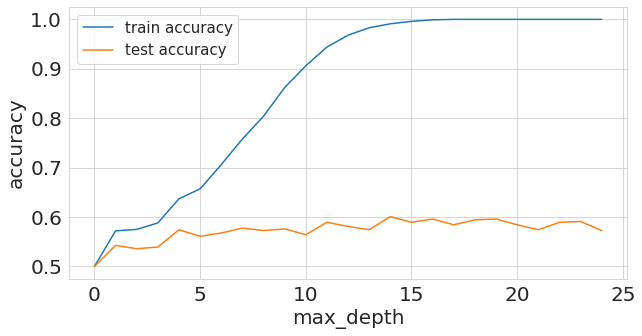

In [12]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracis, label="train accuracy")
plt.plot(test_accuracis, label="test accuracy")
plt.legend(loc="upper left", prop={"size": 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)

## ex. k-fold cross validation

In [13]:
from sklearn import model_selection

if __name__ == "__main__":
    df_here = df.copy()
    
    df_here["kfold"] = -1
    
    df_here = df_here.sample(frac=1).reset_index(drop=True)
    
    kf = model_selection.KFold(n_splits=5)
    
    for fold, (trn_, val_) in enumerate(kf.split(X=df_here)):
        df_here.loc[val_, "kfold"] = fold
        
df_here.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.3,0.490,0.36,1.8,0.222,6.0,16.0,0.99800,3.18,0.60,9.5,3,0
1,7.3,0.340,0.33,2.5,0.064,21.0,37.0,0.99520,3.35,0.77,12.1,4,0
2,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,0,0
3,7.5,0.770,0.20,8.1,0.098,30.0,92.0,0.99892,3.20,0.58,9.2,2,0
4,9.4,0.500,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,3,0


## ex. stratified k-fold: when datasets are imbalance.

In [14]:
from sklearn import model_selection

if __name__ == "__main__":
    df_here = df.copy()
    
    df_here["kfold"] = -1
    
    df_here = df_here.sample(frac=1).reset_index(drop=True)
    
    # fetch target (imbalance) 
    y = df_here.quality
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    for fold, (trn_, val_) in enumerate(kf.split(X=df_here.drop("quality", axis=1), y=y)):
        df_here.loc[val_, "kfold"] = fold
        
df_here.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.4,0.31,0.29,3.1,0.194,14.0,26.0,0.99536,3.22,0.78,12.0,3,0
1,7.5,0.27,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.0,4,0
2,6.9,0.49,0.10,2.3,0.074,12.0,30.0,0.99590,3.42,0.58,10.2,3,0
3,8.1,0.78,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,2,0
4,9.0,0.43,0.34,2.5,0.080,26.0,86.0,0.99870,3.38,0.62,9.5,3,0


## ex. stratified k-fold for regression

In [15]:
import numpy as np

from sklearn import datasets

def create_folds(data):
    
    data["kfold"] = -1
    
    data = data.sample(frac=1).reset_index(drop=True)
    
    # calculate the number of bins by Struge's rule
    num_bins = int(np.floor(1 + np.log2(len(data))))
    
    # bin targets
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    for fold, (trn_, val_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[val_, "kfold"] = fold
        
    # drop the bins column
    data = data.drop("bins", axis=1)
    
    return data

In [19]:
X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
)

df = pd.DataFrame(X, columns=[f"f{i}" for i in range(X.shape[1])])

df.loc[:, "target"] = y

df = create_folds(df)

df.kfold

0        0
1        0
2        0
3        0
4        0
        ..
14995    4
14996    4
14997    4
14998    4
14999    4
Name: kfold, Length: 15000, dtype: int64